# We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
insurance = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv')
df = insurance.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

## Q1. Do smokers have higher insurance charges than non-smokers?

- Null Hypothesis:
> Smokers do not have higher insurance charges than non-smokers

- Alternative Hypothesis:
> Smokers have higher insurance charges than non-smokers

- Significance Level (Alpha) is 0.05

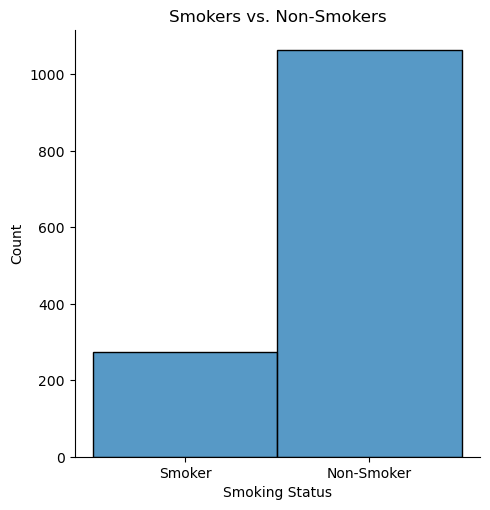

no     1063
yes     274
Name: smoker, dtype: int64

In [7]:
# Numerical data with 2 categories: smoker and non-smoker
# This calls for 2 Sample T- Test

sns.displot(data=df, x= 'smoker')
plt.title('Smokers vs. Non-Smokers')
plt.xticks(ticks=(0,1), labels=['Smoker', 'Non-Smoker'])
plt.xlabel('Smoking Status')
plt.show()
df['smoker'].value_counts()

- Group sizes are greater than 15, I will forgo Normality Tests

In [8]:
# Creating smoker and non-smoker filters
smoker = df.loc[df['smoker']== "yes"].copy()
nsmoker = df.loc[df['smoker']== "no"].copy()

# Defining features of interest
smoker_charges = smoker['charges']
nsmoker_charges = nsmoker['charges']

### Distribution Visualizations

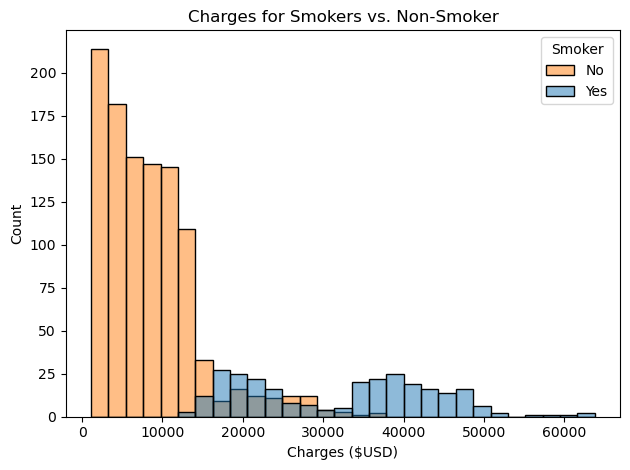

In [9]:
sns.histplot(data=df,
            x='charges',
            hue='smoker')
plt.title('Charges for Smokers vs. Non-Smoker')
plt.xlabel('Charges ($USD)')
plt.legend(title='Smoker', labels=['No', 'Yes'])
plt.tight_layout()
plt.show();

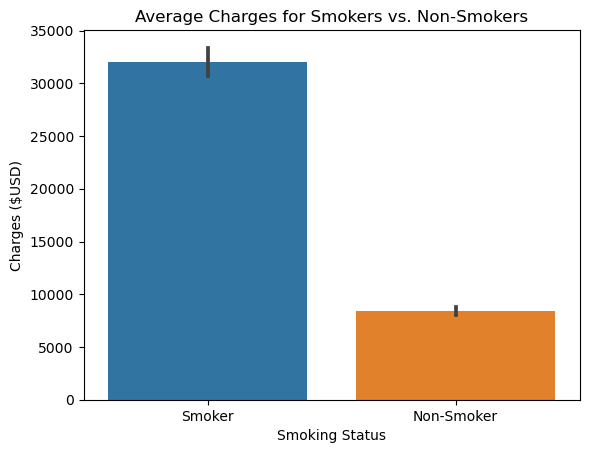

In [10]:
sns.barplot(data=df, y='charges', x='smoker')
plt.xticks(ticks=(0,1), labels=['Smoker', 'Non-Smoker'])
plt.title('Average Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Charges ($USD)');

### Checking for Outliers

In [11]:
# Checking for outliers in smoker charges
zscores = stats.zscore(smoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [12]:
# Checking for outliers in non-smoker charges
zscores= stats.zscore(nsmoker_charges)
outliers = abs(zscores)>3
np.sum(outliers)


24

In [13]:
# Removing outliers in non-smoker charges
nsmoker_charges = nsmoker_charges[(np.abs(stats.zscore(nsmoker_charges)) < 3)]

### Checking for Equal Variance

In [14]:
results = stats.levene(smoker_charges, nsmoker_charges)
results

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

- Our p-value is less than 0.05, therefore we do not have equal variances

### Evaluating the T-test

In [15]:
tresult = stats.ttest_ind(smoker_charges, nsmoker_charges, equal_var = False)
tresult

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

- The p-value is less than our significance level, therefore the null hypothesis can be rejected.

## Q2. Are men more likely to smoke than women?

- Null Hypothesis:
> There is no significance in gender in likelihood of smoking.

- Alternative Hypothesis:
> Men are more likely to smoke than women.

- Significance Level (Alpha) is 0.05

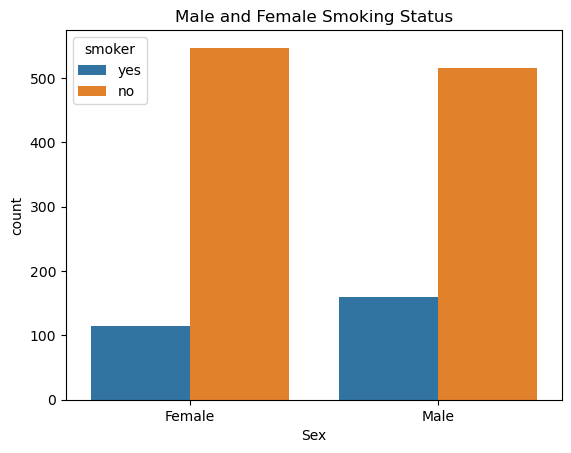

no     1063
yes     274
Name: smoker, dtype: int64

In [16]:
# Categorical data with 2 categories: men and women
# This calls for Chi-Square

sns.countplot(data=df, x= 'sex', hue='smoker')
plt.title('Male and Female Smoking Status')
plt.xticks(ticks=(0,1), labels=['Female','Male'])
plt.xlabel('Sex')
plt.show()
df['smoker'].value_counts()

In [17]:
cross = pd.crosstab(df['sex'], df['smoker'])
cross

smoker,no,yes
sex,,
female,547,115
male,516,159


In [18]:
# Run the Test and Save the Output
result = stats.chi2_contingency(cross)
chi2, p, deg_free, expected_vals = result

In [19]:
print(p)
p<0.05

0.0062765550120107375


True

- The p-value is less than our significance level, therefore the null hypothesis can be rejected.

## Q3. Do different regions have different charges, on average?

- Null Hypothesis:

> There is no significant difference in charges per region.

- Alternative Hypothesis:

> Different regions have different charges, on average.

- Significance Level (Alpha) is 0.05

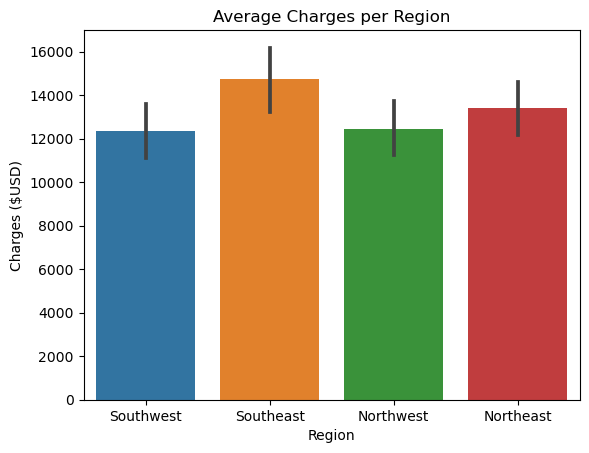

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [20]:
# Numerical data with more than 2 categories (regions).
# This calls for ANOVA and/or Tukey

sns.barplot(data=df, x='region', y='charges')
plt.title('Average Charges per Region')
plt.xticks(ticks=(0,1,2,3), labels=['Southwest', 'Southeast', 'Northwest', 'Northeast'])
plt.xlabel('Region')
plt.ylabel('Charges ($USD)')
plt.show();
df.groupby('region')['charges'].mean()

In [21]:
# Creating region filters
sw = df.loc[df['region']== "southwest"].copy()
se = df.loc[df['region']== "southeast"].copy()
nw = df.loc[df['region']== "northwest"].copy()
ne = df.loc[df['region']== "northeast"].copy()


# Defining features of interest
sw_charges = sw['charges']
se_charges = se['charges']
nw_charges = nw['charges']
ne_charges = ne['charges']

### Checking for Outliers

#### Southwest

In [22]:
zscores = stats.zscore(sw_charges)
outliers = abs(zscores)>3
np.sum(outliers)

8

In [23]:
# Removing outliers in southwest charges
sw_charges = sw_charges[(np.abs(stats.zscore(sw_charges)) < 3)]

#### Southeast

In [24]:
zscores = stats.zscore(se_charges)
outliers = abs(zscores)>3
np.sum(outliers)

2

In [25]:
# Removing outliers in southeast charges
se_charges = se_charges[(np.abs(stats.zscore(se_charges)) < 3)]

#### Northwest

In [26]:
zscores = stats.zscore(nw_charges)
outliers = abs(zscores)>3
np.sum(outliers)

7

In [27]:
# Removing outliers in northwest charges
nw_charges = nw_charges[(np.abs(stats.zscore(nw_charges)) < 3)]

#### Northeast

In [28]:
zscores = stats.zscore(ne_charges)
outliers = abs(zscores)>3
np.sum(outliers)

4

In [29]:
# Removing outliers in northeast charges
ne_charges = ne_charges[(np.abs(stats.zscore(ne_charges)) < 3)]

### Testing Normality

In [31]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

- Group sizes are greater than 15, I will forgo Normality Tests

### Testing Equal Variance

In [36]:
stats.levene(ne_charges, nw_charges, se_charges, sw_charges)

LeveneResult(statistic=9.515214992781328, pvalue=3.218183807441283e-06)

- Our p-value is less than 0.05, therefore we do not have equal variances

### Tukey's Test

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

values = df['charges']
labels = df['region']

In [35]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-955.5437,0.7457,-3397.7353,1486.648,False
northeast,southeast,1329.0269,0.4746,-1045.1237,3703.1776,False
northeast,southwest,-1059.4471,0.6793,-3499.7595,1380.8652,False
northwest,southeast,2284.5706,0.0643,-89.58,4658.7212,False
northwest,southwest,-103.9035,0.9995,-2544.2158,2336.4088,False
southeast,southwest,-2388.4741,0.0477,-4760.6915,-16.2567,True


### Nonparametric Test

In [40]:
stats.kruskal(ne_charges, nw_charges, se_charges, sw_charges)

KruskalResult(statistic=6.770873301852134, pvalue=0.07957070570918574)

From the Tukey's test and the nonparametric test's p-value (over 0.05), we fail to reject the hypothesis.